In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Using UTF-8 for loading because some driver names and track names have weird characters
df = pd.read_csv('data/archive/f1_pitstops_2018_2024.csv', encoding='utf-8', delimiter=',')

In [3]:
df.head(len(df))

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Tire Usage Aggression,Fast Lap Attempts,Position Changes,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,0.017241,44.76882,0.000000,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787
1,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,0.017241,44.76882,0.000000,6.755003,VET,2.0,SOFT,32.0,NaN,Final Stint
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,0.017241,44.73482,0.043478,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821
3,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,0.017241,44.73482,0.043478,6.754254,HAM,2.0,SOFT,39.0,NaN,Final Stint
4,2018,1,Albert Park Grand Prix Circuit,Kimi RÃƒÂ¤ikkÃƒÂ¶nen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,0.017241,45.13482,0.086957,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,0.033333,25.41182,0.739130,3.930495,BOT,1.0,MEDIUM,6.0,6.0,41.144
7370,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,0.033333,25.41182,0.739130,3.930495,BOT,2.0,HARD,24.0,NaN,Final Stint
7371,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,0.038462,41.61482,0.782609,6.364719,COL,1.0,MEDIUM,3.0,3.0,24.941
7372,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,0.038462,41.61482,0.782609,6.364719,COL,2.0,HARD,23.0,NaN,Final Stint


# Dataset Feature Description

* **Season --** Year of the Formula 1 Season
* **Round --** Race number within the Formula 1 season (in question)
* **Circuit --** At what circuit the race was held (with respect to the country)   
* **Driver --** Full name of the Driver
* **Constructor --** Registered name of the Constructor taking participating in the race (Car Manufacturer/Team)
* **Laps --** Number of Laps completed
* **Position --** Finishing position of the driver
* **TotalPitStops --** Total number of pit stops taken by the driver 
* **Race Name --** Name of the Race at the circuit
* **Date --** Date of the race
* **Time_of_race --** Time of the race
* **Location --** Location of the race (in that Country)
* **Country --** Demographic Location on Earth
* **Air_Temp_C --** Average Air Temperature during the race (°C)
* **Track_Temp_C --** Average Track Temperature during the race (°C)
* **Humidity_% --** Measured Humidity (%)
* **Wind_Speed_KMH --** Measured Wind Speed
* **Lap Time Variation --** Variation of the driver's lap times during the race
* **Total Pit Stops --** Total number of pit stops by the driver
* **Tire Usage Aggression --** Aggression score is a reflection of the longitudinal g-force each driver generates, both through acceleration and retardation
* **Fast Lap Attempts --** Total number of attempts for Fastest Lap of the race
* **Position Changes --** Frequency of race position changes
* **Driver Aggression Score --** Driver aggression score
* **Abbreviation --** Abbreviation of the driver name (usually three characters)
* **Stint --** Period a driver spends on the track between pit stops (Pit stop count basically which is Nominal) 
* **Tyre Compound --** Type of tyre fitted on the car for that stint
* **Stint Length --** Total Laps in the stint
* **Pit_Lap --** Lap when driver enters the pits (Nominal feature)
* **Pit Time --** Time spent in the pit lanes (s)

## A bit of a lecture for context

In this dataset there are a few things to know for context

The dataset is understood to be divided into 6 major parts (6 seasons), 22 subparts (22 rounds each season) and depending on how many pitstops a 
driver makes, a data entry is created.

# RULES
***A DRIVER MUST USE AT LEAST TWO TYRE COMPOUNDS DURING A RACE***, meaning there's only $(n - 1)$ pit-stops for every entry present

### TYRES
Tyres come in different types known as compounds. Tyre compounds go from SUPER-HARD to HYPER-SOFT (Until after the 2019 Season), with later compounds made simpler - (HARD - SOFT)
* HARD (or SUPER HARD) -> Least amount of grip, Longest life span
* SOFT (or HYPER SOFT) -> Strongest grip, Shortest life span

However these are logically used in dry conditions, during damp or wet conditions teams have two choices:
* INTERMEDIATE -> Provides the most grip in wet conditions while maintaining the most downforce
* WET -> Provides grip, while clearing standing water on track (When it's raining cats 'n dogs)


**This Notebook aims to predict the finishing position of a driver**

The dataset has a fine and nice feature divide, as such:
* #### Driver Performance Metrics
    * Tire Usage Aggression 
    * Fast Lap Attempts
    * Driver Aggression Scores
    * Position Changes
    * Position

* #### Race Data
    * Laps
    * Stint Length
    * Pit Time

* #### Race conditions
    * Air Temperature
    * Track Temperature
    * Humidity
    * Wind Speed (Km/h)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7374 entries, 0 to 7373
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   7374 non-null   int64  
 1   Round                    7374 non-null   int64  
 2   Circuit                  7374 non-null   object 
 3   Driver                   7374 non-null   object 
 4   Constructor              7374 non-null   object 
 5   Laps                     7374 non-null   int64  
 6   Position                 7374 non-null   int64  
 7   TotalPitStops            7374 non-null   int64  
 8   AvgPitStopTime           7189 non-null   float64
 9   Race Name                7001 non-null   object 
 10  Date                     7001 non-null   object 
 11  Time_of_race             7001 non-null   object 
 12  Location                 7001 non-null   object 
 13  Country                  7001 non-null   object 
 14  Air_Temp_C              

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,7374.0,2021.308245,1.969604,2018.000000,2020.000000,2021.000000,2023.000000,2024.000000
Round,7374.0,10.673312,6.135126,1.000000,5.000000,11.000000,15.000000,24.000000
Laps,7374.0,56.643748,13.922667,0.000000,52.000000,57.000000,66.000000,87.000000
Position,7374.0,10.156089,5.590062,1.000000,5.000000,10.000000,15.000000,20.000000
TotalPitStops,7374.0,2.068348,1.135088,0.000000,1.000000,2.000000,3.000000,7.000000
AvgPitStopTime,7189.0,120.109095,268.723688,17.358500,22.388000,24.414000,30.068000,3055.732000
Air_Temp_C,7001.0,19.520345,5.092982,0.387500,15.958333,19.633333,23.750000,33.295833
Track_Temp_C,7001.0,25.207104,5.195562,5.887500,21.587500,25.175000,29.504167,39.795833
Humidity_%,7001.0,67.576191,14.157319,18.375000,60.500000,70.500000,77.291667,94.333333
Wind_Speed_KMH,7001.0,11.434032,6.073363,3.362500,6.804167,9.408333,15.550000,35.908333


In [6]:
print(df.isna().sum())

Season                        0
Round                         0
Circuit                       0
Driver                        0
Constructor                   0
Laps                          0
Position                      0
TotalPitStops                 0
AvgPitStopTime              185
Race Name                   373
Date                        373
Time_of_race                373
Location                    373
Country                     373
Air_Temp_C                  373
Track_Temp_C                373
Humidity_%                  373
Wind_Speed_KMH              373
Lap Time Variation          185
Total Pit Stops               0
Tire Usage Aggression        66
Fast Lap Attempts           185
Position Changes              0
Driver Aggression Score     185
Abbreviation                  0
Stint                       109
Tire Compound               109
Stint Length                109
Pit_Lap                    2810
Pit_Time                    281
dtype: int64


Numerical Columns with missing values will be handled with the imputation of mean or median values depending on it's use
Categorical columns will also be handled similarly with a few other logic to be ap|plied

In [7]:
# DUPLICATES
print(f'Duplicates in dataframe: {df.duplicated().sum()}, ({np.round(100 * df.duplicated().sum() / len(df), 1)}%)')

Duplicates in dataframe: 0, (0.0%)


No duplicates, Sjajno

In [8]:
df.nunique()

Season                        7
Round                        24
Circuit                      31
Driver                       40
Constructor                  16
Laps                         78
Position                     20
TotalPitStops                 8
AvgPitStopTime             2492
Race Name                    30
Date                        134
Time_of_race                 26
Location                     27
Country                      24
Air_Temp_C                  132
Track_Temp_C                132
Humidity_%                  128
Wind_Speed_KMH              132
Lap Time Variation         2492
Total Pit Stops               8
Tire Usage Aggression       153
Fast Lap Attempts          2492
Position Changes             20
Driver Aggression Score    2636
Abbreviation                 38
Stint                         8
Tire Compound                 9
Stint Length                 72
Pit_Lap                      71
Pit_Time                   3841
dtype: int64

There's 24 Rounds every season. Taking the most prominent tracks/rounds from each season, I'll try to form a trend or relationship between the features:
Relevant columns and the target. This is mostly because some tracks (rounds) weren't constant the whole 7 seasons, however some were.

### Identifying Outliers

In [9]:
# Obtain numerical columns
# numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols = ['Pit_Time', 'Stint Length', 'Position Changes', 'Air_Temp_C', 'Track_Temp_C', 'Humidity_%', 'Wind_Speed_KMH']

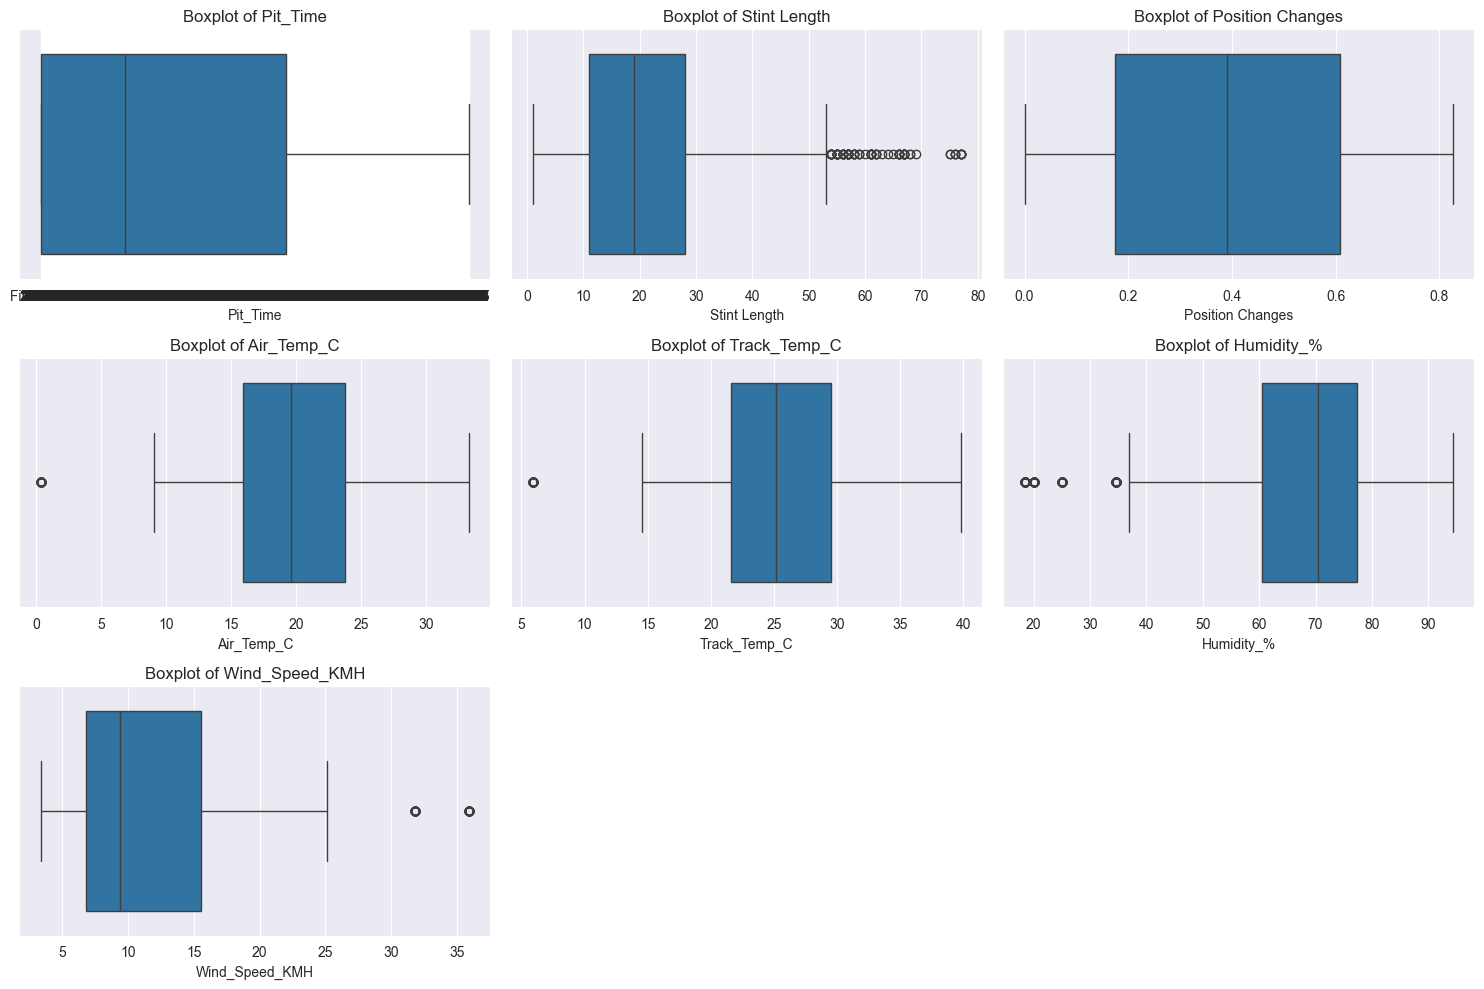

In [10]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()

In [11]:
# Most of these plots seemed okay, however:
# - Plots for PIT_TIMES, STINT LENGTH & WIND_SPEED were clearly negatively sc

In [12]:
# print(df['Pit_Time'].sample(100).tolist())

In [13]:
final_stints = (df['Pit_Time'] == 'Final Stint')
normal_stints = ((df['Pit_Time'] != 'Final Stint') | df['Pit_Time'].apply(lambda x: isinstance(x, (int, float))))

print(f"Normal Stints {normal_stints.sum()}\nFinal Stints in Pit Time Column: {final_stints.sum()}")

# Every normal stint value happened to be in string format, while missing values were 'missing numerical values'.
# The comparison lies within strings here

stints = pd.DataFrame({ 
    'Normal_Stints': normal_stints, 
    'Final_Stints': final_stints
})
stints

Normal Stints 4845
Final Stints in Pit Time Column: 2529


,Normal_Stints,Final_Stints
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
...,...,...
7369,True,False
7370,False,True
7371,True,False
7372,False,True


By the looks of it, it's better to handle the NaNs and Final Stint Values from the Pit_Lap and Pit_Time as such:
* NaNs most likely indicate the final stint - meaning they didn't pit -- **Impute the Max Lap for the race**
* Final Stint Values means the next pitstop was literally at Parc Ferme -- **Impute with 0 meaning EOR**

In [14]:
df['Max_Stint'] = df.groupby(['Season', 'Round', 'Driver'])['Stint'].transform('max')
df['Is_Final_Stint'] = (df['Stint'] == df['Max_Stint'])

print(f"Total rows: {len(df)}")
print(f"Final stints identified: {df['Is_Final_Stint'].sum()}")

Total rows: 7374
Final stints identified: 2712


## Handline Pit Laps

In [15]:
max_laps = df.groupby(['Season', 'Round'])['Laps'].transform('max')

mask_final_stint_missing_pit_lap = df['Is_Final_Stint'] & df['Pit_Lap'].isna()
print(f"Missing Pit_Lap values in final stints: {mask_final_stint_missing_pit_lap.sum()}")

Missing Pit_Lap values in final stints: 2696


In [16]:
df.loc[mask_final_stint_missing_pit_lap, 'Pit_Lap'] = max_laps[mask_final_stint_missing_pit_lap]

mask_non_final_missing_pit_lap = (~df['Is_Final_Stint']) & df['Pit_Lap'].isna()
print(f"Missing Pit_Lap values in non-final stints: {mask_non_final_missing_pit_lap.sum()}")

Missing Pit_Lap values in non-final stints: 114


In [17]:
if 'Stint Length' in df.columns:
    df.loc[mask_non_final_missing_pit_lap, 'Pit_Lap'] = df.loc[mask_non_final_missing_pit_lap, 'Stint Length']
    
else:
    # If Stint Length is not available, use the median pit lap for that driver in that race
    for idx in df[mask_non_final_missing_pit_lap].index:
        season = df.loc[idx, 'Season']
        round_num = df.loc[idx, 'Round']
        driver = df.loc[idx, 'Driver']

        # Get median pit lap for this driver in this race
        median_pit_lap = df[(df['Season'] == season) & (df['Round'] == round_num) & (df['Driver'] == driver) & df['Pit_Lap'].notna()]['Pit_Lap'].median()

        if not pd.isna(median_pit_lap):
            df.loc[idx, 'Pit_Lap'] = median_pit_lap
            
        else:
            # If no data for this driver, use median for this race
            race_median = df[(df['Season'] == season) & (df['Round'] == round_num) & df['Pit_Lap'].notna()]['Pit_Lap'].median()
            df.loc[idx, 'Pit_Lap'] = race_median if not pd.isna(race_median) else 20  # Default to 20 if no data


## Handling Pit Time

In [18]:
mask_final_stint_values = df['Pit_Time'] == 'Final Stint'
print(f"'Final Stint' values in Pit_Time: {mask_final_stint_values.sum()}")

'Final Stint' values in Pit_Time: 2529


In [19]:
# Converting Pit_Time to numeric, handling 'Final Stint' values

df['Pit_Time_Numeric'] = pd.to_numeric(df['Pit_Time'], errors='coerce')
df.loc[mask_final_stint_values, 'Pit_Time_Numeric'] = 0  # Set 'Final Stint' to 0

mask_final_stint_missing_pit_time = df['Is_Final_Stint'] & df['Pit_Time_Numeric'].isna()
print(f"Missing Pit_Time values in final stints: {mask_final_stint_missing_pit_time.sum()}")

df.loc[mask_final_stint_missing_pit_time, 'Pit_Time_Numeric'] = 0

Missing Pit_Time values in final stints: 171


In [20]:
# For missing values in non-final stints, impute using team's typical pit time at that circuit
mask_non_final_missing_pit_time = (~df['Is_Final_Stint']) & df['Pit_Time_Numeric'].isna()
print(f"Missing Pit_Time values in non-final stints: {mask_non_final_missing_pit_time.sum()}")

Missing Pit_Time values in non-final stints: 110


In [21]:
for idx in df[mask_non_final_missing_pit_time].index:
    constructor = df.loc[idx, 'Constructor']
    circuit = df.loc[idx, 'Circuit']

    # Try to get team's typical pit time at this circuit
    team_circuit_median = df[(df['Constructor'] == constructor) & (df['Circuit'] == circuit) &
                             (~mask_final_stint_values) &  # Excluding 'Final Stint'
                             df['Pit_Time_Numeric'].notna()]['Pit_Time_Numeric'].median()

    if not pd.isna(team_circuit_median):
        df.loc[idx, 'Pit_Time_Numeric'] = team_circuit_median
    else:
        # If no data for this team at this circuit, use team's overall median
        team_median = df[(df['Constructor'] == constructor) &
                         (~mask_final_stint_values) &  # Excluding 'Final Stint'
                         df['Pit_Time_Numeric'].notna()]['Pit_Time_Numeric'].median()

        if not pd.isna(team_median):
            df.loc[idx, 'Pit_Time_Numeric'] = team_median
        else:
            # If still no data, use overall median
            overall_median = df[(~mask_final_stint_values) &
                                df['Pit_Time_Numeric'].notna()]['Pit_Time_Numeric'].median()
            df.loc[idx, 'Pit_Time_Numeric'] = overall_median

In [22]:
# Clean up the original Pit_Time column by replacing with our numeric version
df['Pit_Time'] = df['Pit_Time_Numeric']

# Check for any remaining missing values
missing_pit_lap = df['Pit_Lap'].isna().sum()
missing_pit_time = df['Pit_Time'].isna().sum()

In [23]:
# Check for any remaining missing values
missing_pit_lap = df['Pit_Lap'].isna().sum()
missing_pit_time = df['Pit_Time'].isna().sum()

print("\nAfter imputation:")
print(f"Missing Pit_Lap values: {missing_pit_lap}")
print(f"Missing Pit_Time values: {missing_pit_time}")


After imputation:
Missing Pit_Lap values: 109
Missing Pit_Time values: 0


In [24]:
df

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time,Max_Stint,Is_Final_Stint,Pit_Time_Numeric
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787,2.0,False,21.787
1,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,2.0,SOFT,32.0,58.0,0.000,2.0,True,0.000
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821,2.0,False,21.821
3,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,2.0,SOFT,39.0,58.0,0.000,2.0,True,0.000
4,2018,1,Albert Park Grand Prix Circuit,Kimi RÃƒÂ¤ikkÃƒÂ¶nen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421,2.0,False,21.421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,3.930495,BOT,1.0,MEDIUM,6.0,6.0,41.144,2.0,False,41.144
7370,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,3.930495,BOT,2.0,HARD,24.0,58.0,0.000,2.0,True,0.000
7371,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,6.364719,COL,1.0,MEDIUM,3.0,3.0,24.941,2.0,False,24.941
7372,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,6.364719,COL,2.0,HARD,23.0,58.0,0.000,2.0,True,0.000


In [25]:
print(df.isna().sum())

Season                       0
Round                        0
Circuit                      0
Driver                       0
Constructor                  0
Laps                         0
Position                     0
TotalPitStops                0
AvgPitStopTime             185
Race Name                  373
Date                       373
Time_of_race               373
Location                   373
Country                    373
Air_Temp_C                 373
Track_Temp_C               373
Humidity_%                 373
Wind_Speed_KMH             373
Lap Time Variation         185
Total Pit Stops              0
Tire Usage Aggression       66
Fast Lap Attempts          185
Position Changes             0
Driver Aggression Score    185
Abbreviation                 0
Stint                      109
Tire Compound              109
Stint Length               109
Pit_Lap                    109
Pit_Time                     0
Max_Stint                  109
Is_Final_Stint               0
Pit_Time

In [26]:
# Checking for inconsistent driver names or teams
print(f"Unique drivers: {df['Driver'].nunique()}")
print(f"Unique Teams: {df['Constructor'].nunique()}")

Unique drivers: 40
Unique Teams: 16


In [27]:
name_encoding_fixes = {
    'Kimi RÃƒÂ¤ikkÃƒÂ¶nen': 'Kimi Räikkönen',
    'Nico HÃƒÂ¼lkenberg': 'Nico Hülkenberg',
    'Sergio PÃƒÂ©rez': 'Sergio Pérez'
}

track_encoding_fixes = {
    'AutÃƒÂ³dromo Hermanos RodrÃƒÂ­guez': 'Autódromo Hermanos Rodríguez',
    'AutÃƒÂ³dromo Internacional do Algarve': 'Autódromo Internacional do Algarve',
    'NÃƒÂ¼rburgring': 'Nürburgring',
    'AutÃƒÂ³dromo JosÃƒÂ© Carlos Pace': 'Autódromo José Carlos Pace'
}

In [28]:
for incorrect, correct in name_encoding_fixes.items():
    df['Driver'] = df['Driver'].replace(incorrect, correct)

for incorrect, correct in track_encoding_fixes.items():
    df['Circuit'] = df['Circuit'].replace(incorrect, correct)
    
df.head(5)

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time,Max_Stint,Is_Final_Stint,Pit_Time_Numeric
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787,2.0,False,21.787
1,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,2.0,SOFT,32.0,58.0,0.000,2.0,True,0.000
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821,2.0,False,21.821
3,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,2.0,SOFT,39.0,58.0,0.000,2.0,True,0.000
4,2018,1,Albert Park Grand Prix Circuit,Kimi Räikkönen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421,2.0,False,21.421


In [29]:
missing_meta_data = missing_metadata = df[df['Time_of_race'].isna() | df['Location'].isna() | df['Country'].isna() | df['Air_Temp_C'].isna()]

In [30]:
print("Circuits with missing metadata:")
print(missing_metadata['Circuit'].value_counts())

print("\nSeasons affected:")
print(missing_metadata['Season'].value_counts())

Circuits with missing metadata:
Circuit
Autódromo Hermanos Rodríguez          234
Autódromo Internacional do Algarve     83
Nürburgring                            53
Autódromo José Carlos Pace              3
Name: count, dtype: int64

Seasons affected:
Season
2021    80
2023    58
2020    56
2018    47
2019    45
2024    44
2022    43
Name: count, dtype: int64


In [31]:
categorical_cols = ['Time_of_race', 'Location', 'Country']

In [32]:
for col in categorical_cols:
    # Dict holding a map of circuit to their modes
    circuit_mode = {}
    
    for circuit in df['Circuit'].unique():
        circuit_data = df[df['Circuit'] == circuit][col]
        
        if not circuit_data.empty and not circuit_data.dropna().empty:
            mode_value = circuit_data.mode()[0]
            circuit_mode[circuit] = mode_value
    
    # Applying the mapping to fill missing values        
    for circuit, mode_value in circuit_mode.items():
        mask = (df['Circuit'] == circuit) & (df[col].isna())
        df.loc[mask, col] = mode_value
        
    # Fail-safe to use the overall mode
    if df[col].isna().sum() > 0:
        overall_mode = df[col].mode()[0]
        df[col] = df[col].fillna(overall_mode)
        
        print(f"Filled remaining missing {col} values with an overall mode {overall_mode}")

Filled remaining missing Time_of_race values with an overall mode 13:00:00Z
Filled remaining missing Location values with an overall mode Sakhir
Filled remaining missing Country values with an overall mode Italy


In [33]:
track_condition_data = ['Air_Temp_C', 'Track_Temp_C', 'Humidity_%', 'Wind_Speed_KMH']

for col in track_condition_data:
    circuit_mean = {}
    
    for circuit in df['Circuit'].unique():
        circuit_data = df[df['Circuit'] == circuit][col]
        
        if not circuit_data.empty and not circuit_data.dropna().empty:
            circuit_mean[circuit] = circuit_data.mean()
            
    # Apply the mapping to fill missing values
    for circuit, mean_value in circuit_mean.items():
        mask = (df['Circuit'] == circuit) & (df[col].isna())
        df.loc[mask, col] = mean_value
        
    # For any other missing values, seasonal patterns can be used
    if df[col].isna().sum() > 0:
        if 'Date' in df.columns:
            df['Month'] = pd.to_datetime(df['Date']).dt.month

            for month in df['Month'].unique():
                month_median = df[df['Month'] == month][col].median()
                mask = (df['Month'] == month) & (df[col].isna())
                df.loc[mask, col] = month_median

            # Remove temporary month column
            df.drop('Month', axis=1, inplace=True)

        # Use overall median as final fallback
        if df[col].isna().sum() > 0:
            overall_median = df[col].median()
            df[col] = df[col].fillna(overall_median)
            
            print(f"Filled remaining missing {col} values with overall median: {overall_median}")

Filled remaining missing Air_Temp_C values with overall median: 19.633333333333333
Filled remaining missing Track_Temp_C values with overall median: 25.175
Filled remaining missing Humidity_% values with overall median: 70.5
Filled remaining missing Wind_Speed_KMH values with overall median: 9.408333333333331


In [34]:
remaining_missing = df[categorical_cols + numerical_cols].isna().sum()

In [35]:
print("\nRemaining missing values after circuit-based imputation:")
print(remaining_missing)


Remaining missing values after circuit-based imputation:
Time_of_race          0
Location              0
Country               0
Pit_Time              0
Stint Length        109
Position Changes      0
Air_Temp_C            0
Track_Temp_C          0
Humidity_%            0
Wind_Speed_KMH        0
dtype: int64


In [36]:
print(df.isna().sum())

Season                       0
Round                        0
Circuit                      0
Driver                       0
Constructor                  0
Laps                         0
Position                     0
TotalPitStops                0
AvgPitStopTime             185
Race Name                  373
Date                       373
Time_of_race                 0
Location                     0
Country                      0
Air_Temp_C                   0
Track_Temp_C                 0
Humidity_%                   0
Wind_Speed_KMH               0
Lap Time Variation         185
Total Pit Stops              0
Tire Usage Aggression       66
Fast Lap Attempts          185
Position Changes             0
Driver Aggression Score    185
Abbreviation                 0
Stint                      109
Tire Compound              109
Stint Length               109
Pit_Lap                    109
Pit_Time                     0
Max_Stint                  109
Is_Final_Stint               0
Pit_Time

In [37]:
sample_circuit = df['Circuit'].value_counts().index[0]  # Most common circuit
print(f"\nSanity check for {sample_circuit}:")

for col in categorical_cols + numerical_cols:
    original_values = df[(df['Circuit'] == sample_circuit) & (~df.index.isin(missing_metadata.index))][col]
    imputed_values = df[(df['Circuit'] == sample_circuit) & (df.index.isin(missing_metadata.index))][col]

    if not original_values.empty and not imputed_values.empty:
        if col in categorical_cols:
            print(f"{col} - Original most common: {original_values.mode()[0]}, Imputed: {imputed_values.iloc[0]}")
        else:
            print(f"{col} - Original median: {original_values.median()}, Imputed: {imputed_values.iloc[0]}")


Sanity check for Bahrain International Circuit:


In [38]:
df

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time,Max_Stint,Is_Final_Stint,Pit_Time_Numeric
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787,2.0,False,21.787
1,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,2.0,SOFT,32.0,58.0,0.000,2.0,True,0.000
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821,2.0,False,21.821
3,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,2.0,SOFT,39.0,58.0,0.000,2.0,True,0.000
4,2018,1,Albert Park Grand Prix Circuit,Kimi Räikkönen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421,2.0,False,21.421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,3.930495,BOT,1.0,MEDIUM,6.0,6.0,41.144,2.0,False,41.144
7370,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,3.930495,BOT,2.0,HARD,24.0,58.0,0.000,2.0,True,0.000
7371,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,6.364719,COL,1.0,MEDIUM,3.0,3.0,24.941,2.0,False,24.941
7372,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,6.364719,COL,2.0,HARD,23.0,58.0,0.000,2.0,True,0.000


In [39]:
print(f"Missing AvgPitStopTime values before imputation: {df['AvgPitStopTime'].isna().sum()}")

Missing AvgPitStopTime values before imputation: 185


In [40]:
# Create team-circuit level medians
team_circuit_pit_times = df.groupby(['Constructor', 'Circuit'])['AvgPitStopTime'].transform(
    lambda x: x.median() if not x.empty and not x.dropna().empty else np.nan)

# Create team-level medians
team_pit_times = df.groupby('Constructor')['AvgPitStopTime'].transform(
    lambda x: x.median() if not x.empty and not x.dropna().empty else np.nan)

# Apply team-circuit level first
mask_missing_pit_times = df['AvgPitStopTime'].isna()
df.loc[mask_missing_pit_times, 'AvgPitStopTime'] = team_circuit_pit_times[mask_missing_pit_times]

# Apply team-level for remaining missing values
mask_still_missing = df['AvgPitStopTime'].isna()
if mask_still_missing.sum() > 0:
    df.loc[mask_still_missing, 'AvgPitStopTime'] = team_pit_times[mask_still_missing]

In [41]:
# Apply global median for any remaining missing values
global_median_pit_time = df['AvgPitStopTime'].median()
df['AvgPitStopTime'] = df['AvgPitStopTime'].fillna(global_median_pit_time)

print(f"Missing AvgPitStopTime values after imputation: {df['AvgPitStopTime'].isna().sum()}")

Missing AvgPitStopTime values after imputation: 0


In [42]:
print(f"Missing Race Name values before imputation: {df['Race Name'].isna().sum()}")

Missing Race Name values before imputation: 373


In [43]:
circuit_to_race_name = {}

for circuit in df['Circuit'].unique():
    circuit_data = df[df['Circuit'] == circuit]['Race Name']
    
    if not circuit_data.empty and not circuit_data.dropna().empty:
        circuit_to_race_name[circuit] = circuit_data.mode()[0]

# Apply the mapping
for circuit, race_name in circuit_to_race_name.items():
    mask = (df['Circuit'] == circuit) & (df['Race Name'].isna())
    df.loc[mask, 'Race Name'] = race_name

# For any circuit without a mapped race name, use country-based fallback
for circuit in df['Circuit'].unique():
    if circuit not in circuit_to_race_name:
        # Get the country for this circuit
        country = df[df['Circuit'] == circuit]['Country'].mode()[0]
        
        if not pd.isna(country):
            fallback_name = f"{country} Grand Prix"
            mask = (df['Circuit'] == circuit) & (df['Race Name'].isna())
            df.loc[mask, 'Race Name'] = fallback_name

In [44]:
# Final check and fallback
if df['Race Name'].isna().sum() > 0:
    print("Using fallback for remaining missing Race Names")
    
    df['Race Name'] = df['Race Name'].fillna(df['Circuit'] + " Grand Prix")

In [45]:
print(f"Missing Race Name values after imputation: {df['Race Name'].isna().sum()}")

Missing Race Name values after imputation: 0


In [46]:
# 3. Handle Date (373 missing values)
print(f"Missing Date values before imputation: {df['Date'].isna().sum()}")

Missing Date values before imputation: 373


In [47]:
# First approach: Circuit-Season round position
# Create a date estimator function
def estimate_date(row):
    circuit = row['Circuit']
    season = row['Season']
    round_num = row['Round']

    # Find dates for this circuit in other seasons
    circuit_dates = df[(df['Circuit'] == circuit) & (df['Date'].notna())]['Date'].tolist()

    if circuit_dates:
        # Convert to datetime
        circuit_dates = pd.to_datetime(circuit_dates)
        
        # Extract typical month and day
        typical_month = pd.Series([d.month for d in circuit_dates]).mode()[0]
        typical_day = pd.Series([d.day for d in circuit_dates]).mode()[0]
        
        # Create estimated date
        return pd.Timestamp(year=season, month=typical_month, day=typical_day)

    # Fallback: use round position
    round_dates = df[(df['Season'] == season) & (df['Round'] == round_num) & (df['Date'].notna())]['Date'].tolist()

    if round_dates:
        return pd.to_datetime(round_dates[0])

    # Final fallback: estimate based on round number (assume season starts in March)
    # This is a very rough approximation
    start_date = pd.Timestamp(year=season, month=3, day=1)
    estimated_date = start_date + pd.Timedelta(days=(round_num-1)*14)  # ~2 weeks between races

    return estimated_date

In [48]:
# Apply the estimator to missing dates
mask_missing_dates = df['Date'].isna()

for idx in df[mask_missing_dates].index:
    df.loc[idx, 'Date'] = estimate_date(df.loc[idx])

print(f"Missing Date values after imputation: {df['Date'].isna().sum()}")

# Final verification
print("\nRemaining missing values after all imputations:")
print(df[['AvgPitStopTime', 'Race Name', 'Date']].isna().sum())

Missing Date values after imputation: 0

Remaining missing values after all imputations:
AvgPitStopTime    0
Race Name         0
Date              0
dtype: int64


In [49]:
print(df.isna().sum())

Season                       0
Round                        0
Circuit                      0
Driver                       0
Constructor                  0
Laps                         0
Position                     0
TotalPitStops                0
AvgPitStopTime               0
Race Name                    0
Date                         0
Time_of_race                 0
Location                     0
Country                      0
Air_Temp_C                   0
Track_Temp_C                 0
Humidity_%                   0
Wind_Speed_KMH               0
Lap Time Variation         185
Total Pit Stops              0
Tire Usage Aggression       66
Fast Lap Attempts          185
Position Changes             0
Driver Aggression Score    185
Abbreviation                 0
Stint                      109
Tire Compound              109
Stint Length               109
Pit_Lap                    109
Pit_Time                     0
Max_Stint                  109
Is_Final_Stint               0
Pit_Time

In [50]:
# Let's examine the rows with missing stint information
missing_stint_data = df[df['Stint'].isna()]

print(f"Number of rows with missing stint data: {len(missing_stint_data)}")

# Analyze patterns in the missing data
print("\nDistribution by Season:")
print(missing_stint_data['Season'].value_counts())

print("\nDistribution by Circuit:")
print(missing_stint_data['Circuit'].value_counts().head(20))

print("\nDistribution by Driver:")
print(missing_stint_data['Driver'].value_counts().head(20))

print("\nDistribution by Constructor:")
print(missing_stint_data['Constructor'].value_counts())

Number of rows with missing stint data: 109

Distribution by Season:
Season
2018    60
2019    39
2020     3
2021     3
2022     2
2023     2
Name: count, dtype: int64

Distribution by Circuit:
Circuit
Yas Marina Circuit                42
Bahrain International Circuit      6
Marina Bay Street Circuit          4
Autodromo Nazionale di Monza       4
Silverstone Circuit                4
Albert Park Grand Prix Circuit     3
Autódromo Hermanos Rodríguez       3
Circuit of the Americas            3
Suzuka Circuit                     3
Sochi Autodrom                     3
Circuit de Spa-Francorchamps       3
Hungaroring                        3
Hockenheimring                     3
Red Bull Ring                      3
Circuit Paul Ricard                3
Circuit Gilles Villeneuve          3
Circuit de Monaco                  3
Circuit de Barcelona-Catalunya     3
Baku City Circuit                  3
Shanghai International Circuit     3
Name: count, dtype: int64

Distribution by Driver:
Driver


In [51]:
# Check for DNF (Did Not Finish) patterns
if 'Position' in missing_stint_data.columns:
    print("\nPosition distribution (DNF check):")
    print(missing_stint_data['Position'].value_counts())

# Check for relationship with TotalPitStops
print("\nTotal Pit Stops distribution:")
print(missing_stint_data['TotalPitStops'].value_counts())


Position distribution (DNF check):
Position
16    12
20    11
15    11
17     9
18     9
19     8
13     7
14     6
12     6
10     4
9      4
11     4
8      4
1      2
2      2
3      2
4      2
5      2
6      2
7      2
Name: count, dtype: int64

Total Pit Stops distribution:
TotalPitStops
1    56
2    30
0    13
3     8
4     1
5     1
Name: count, dtype: int64


In [52]:
# Check if these are mostly DNF entries
if 'Laps' in missing_stint_data.columns:
    max_laps_by_race = df.groupby(['Season', 'Round'])['Laps'].max()

    # Add a column showing percentage of race completed
    missing_stint_data['Race_Completion'] = missing_stint_data.apply(
        lambda row: row['Laps'] / max_laps_by_race.loc[(row['Season'], row['Round'])] * 100,
        axis=1
    )

    print("\nRace completion percentage statistics:")
    print(missing_stint_data['Race_Completion'].describe())

    # Count entries with low completion percentage
    dnf_threshold = 90  # Typically, below 90% is not classified
    print(f"\nEntries with less than {dnf_threshold}% race completion: "
          f"{(missing_stint_data['Race_Completion'] < dnf_threshold).sum()}")

# Check for Stoffel Vandoorne's entry from the sample data
vandoorne_entries = df[(df['Driver'] == 'Stoffel Vandoorne')]
print("\nStoffel Vandoorne entries (sample from data):")

for idx, row in vandoorne_entries.iterrows():
    print(f"Season: {row['Season']}, Round: {row['Round']}, "
          f"Position: {row['Position']}, Stint data present: {not pd.isna(row['Stint'])}")


Race completion percentage statistics:
count    109.000000
mean      85.947818
std       29.775781
min        0.000000
25%       96.153846
50%       98.113208
75%       98.717949
max      100.000000
Name: Race_Completion, dtype: float64

Entries with less than 90% race completion: 20

Stoffel Vandoorne entries (sample from data):
Season: 2018, Round: 1, Position: 9, Stint data present: False
Season: 2018, Round: 2, Position: 8, Stint data present: False
Season: 2018, Round: 3, Position: 13, Stint data present: False
Season: 2018, Round: 4, Position: 9, Stint data present: False
Season: 2018, Round: 5, Position: 15, Stint data present: False
Season: 2018, Round: 6, Position: 14, Stint data present: False
Season: 2018, Round: 7, Position: 16, Stint data present: False
Season: 2018, Round: 8, Position: 12, Stint data present: False
Season: 2018, Round: 9, Position: 15, Stint data present: False
Season: 2018, Round: 10, Position: 11, Stint data present: False
Season: 2018, Round: 11, Posi

In [53]:
# Filling missing tire compounds
for idx in df[df['Tire Compound'].isna()].index:
    season = df.loc[idx, 'Season']
    round_num = df.loc[idx, 'Round']

    # Find most common starting tire for this race
    filtered_tires = df[(df['Season'] == season) & (df['Round'] == round_num) & (df['Stint'] == 1) & df['Tire Compound'].notna()]['Tire Compound']

    # Check if we have valid data
    if not filtered_tires.empty:
        most_common_tire = filtered_tires.mode()
        
        # Check if mode returned any values
        if not most_common_tire.empty:
            most_common_tire = most_common_tire[0]
        else:
            # If no mode, use a default or keep as NaN
            most_common_tire = None  # or some default value
    else:
        # No data for this race/season combination
        most_common_tire = None  # or some default value

    # Only assign if we found a valid value
    if most_common_tire is not None:
        df.loc[idx, 'Tire Compound'] = most_common_tire

In [54]:
print(df.isna().sum())

Season                       0
Round                        0
Circuit                      0
Driver                       0
Constructor                  0
Laps                         0
Position                     0
TotalPitStops                0
AvgPitStopTime               0
Race Name                    0
Date                         0
Time_of_race                 0
Location                     0
Country                      0
Air_Temp_C                   0
Track_Temp_C                 0
Humidity_%                   0
Wind_Speed_KMH               0
Lap Time Variation         185
Total Pit Stops              0
Tire Usage Aggression       66
Fast Lap Attempts          185
Position Changes             0
Driver Aggression Score    185
Abbreviation                 0
Stint                      109
Tire Compound               40
Stint Length               109
Pit_Lap                    109
Pit_Time                     0
Max_Stint                  109
Is_Final_Stint               0
Pit_Time

In [55]:
# Imputing the Lap Time Variations is critical as it captures driver consistency throughout the race

# Check basic statistics
print("Lap Time Variation - Basic Statistics:")
print(df['Lap Time Variation'].describe())

# Check for missing values
missing_lap_time_var = df['Lap Time Variation'].isna().sum()
print(f"\nMissing Lap Time Variation values: {missing_lap_time_var}")

Lap Time Variation - Basic Statistics:
count    7189.000000
mean        0.034075
std         0.088420
min         0.000266
25%         0.001921
50%         0.002588
75%         0.004448
max         1.000000
Name: Lap Time Variation, dtype: float64

Missing Lap Time Variation values: 185


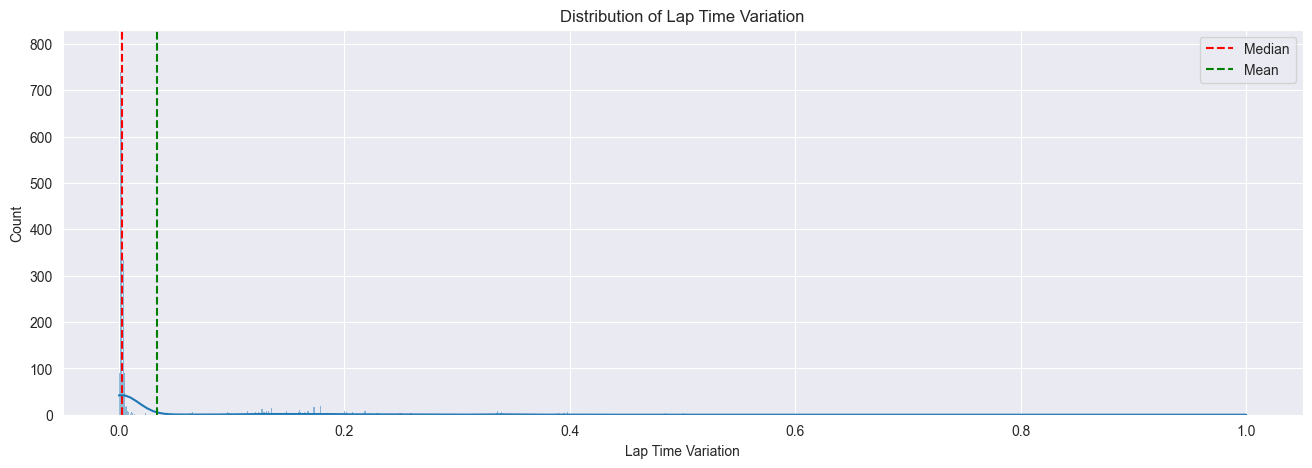

In [56]:
# Visualize the distribution
plt.figure(figsize=(16, 5))
sns.histplot(df['Lap Time Variation'].dropna(), kde=True)
plt.title('Distribution of Lap Time Variation')

plt.xlabel('Lap Time Variation')

plt.axvline(df['Lap Time Variation'].median(), color='red', linestyle='--', label='Median')
plt.axvline(df['Lap Time Variation'].mean(), color='green', linestyle='--', label='Mean')

plt.legend()
plt.show()

In [57]:
# This might be a hard one to handle.
# THere are key factors that influence lap times such as the car, circuit, position during the race, tire usage and or driver aggression score

factors = ['Constructor', 'Circuit', 'Position', 'Tire Usage Aggression', 'Driver Aggression Score']

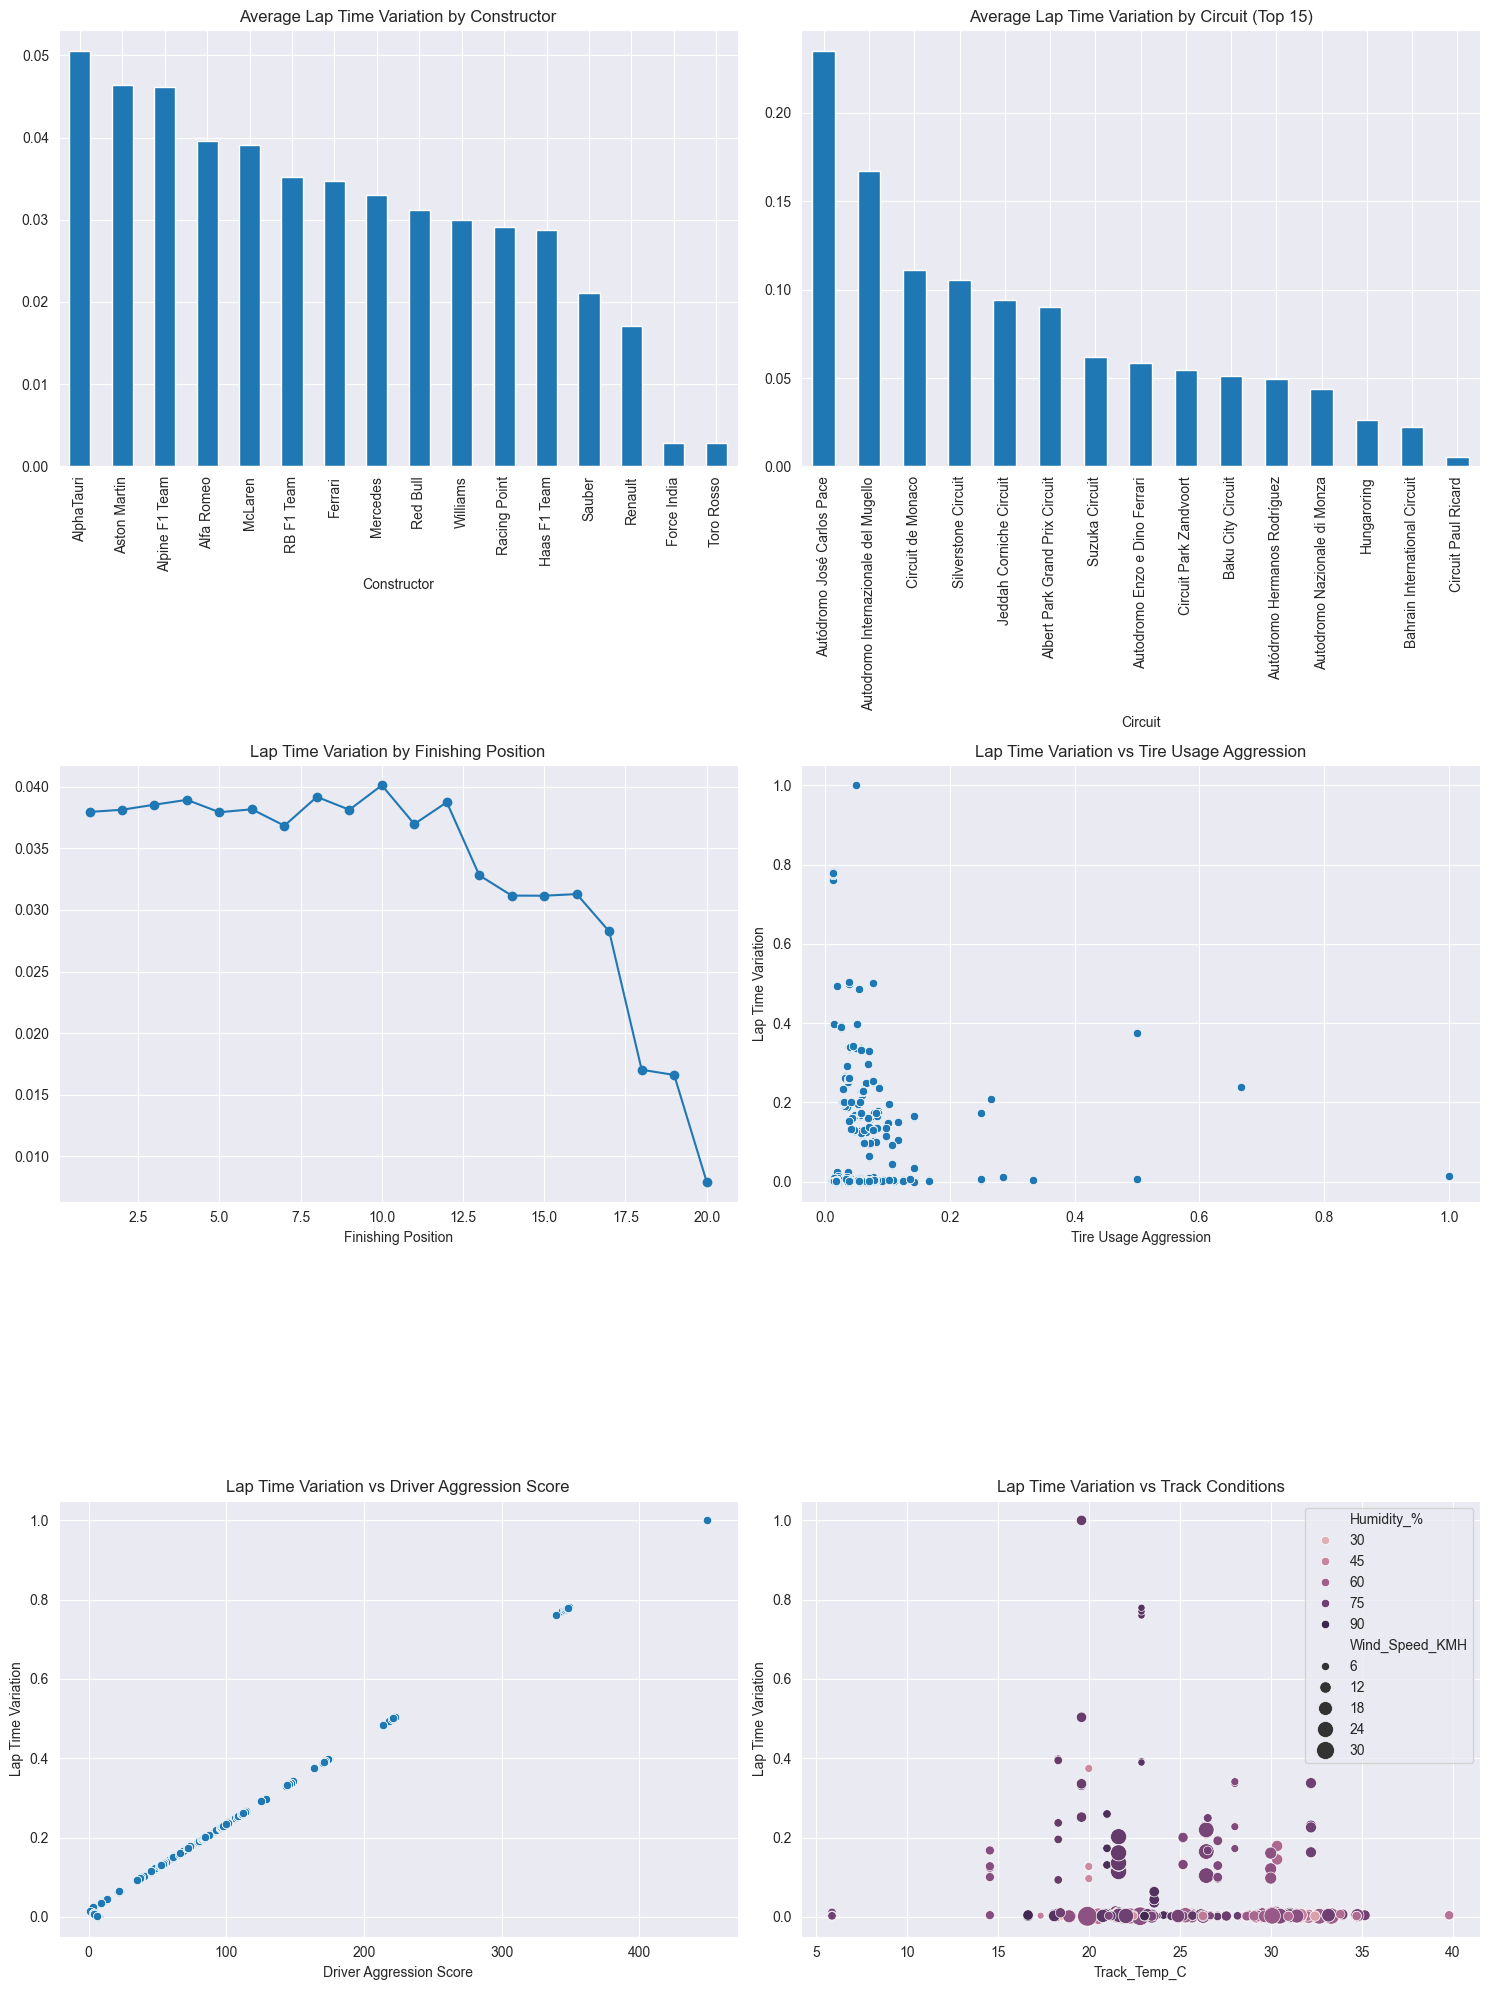

In [58]:
# Create a figure for analyzing relationships
plt.figure(figsize=(15, 20))

# 1. Constructor-based analysis (team equipment affects consistency)
plt.subplot(3, 2, 1)
constructor_var = df.groupby('Constructor')['Lap Time Variation'].mean().sort_values(ascending=False)
constructor_var.plot(kind='bar')
plt.title('Average Lap Time Variation by Constructor')
plt.xticks(rotation=90)
plt.tight_layout()

# 2. Circuit-based analysis (some tracks lead to more variable times)
plt.subplot(3, 2, 2)
circuit_var = df.groupby('Circuit')['Lap Time Variation'].mean().sort_values(ascending=False).head(15)
circuit_var.plot(kind='bar')
plt.title('Average Lap Time Variation by Circuit (Top 15)')
plt.xticks(rotation=90)
plt.tight_layout()

# 3. Position-based analysis (front runners tend to be more consistent)
plt.subplot(3, 2, 3)
position_var = df.groupby('Position')['Lap Time Variation'].mean().head(20)
position_var.plot(kind='line', marker='o')
plt.title('Lap Time Variation by Finishing Position')
plt.xlabel('Finishing Position')
plt.tight_layout()

# 4. Tire Usage Aggression correlation
plt.subplot(3, 2, 4)
sns.scatterplot(x='Tire Usage Aggression', y='Lap Time Variation', data=df)
plt.title('Lap Time Variation vs Tire Usage Aggression')
plt.tight_layout()

# 5. Driver Aggression Score correlation
plt.subplot(3, 2, 5)
sns.scatterplot(x='Driver Aggression Score', y='Lap Time Variation', data=df)
plt.title('Lap Time Variation vs Driver Aggression Score')
plt.tight_layout()

# 6. Additional analysis: Weather impact (if available)
if all(col in df.columns for col in ['Air_Temp_C', 'Track_Temp_C', 'Humidity_%']):
    plt.subplot(3, 2, 6)
    sns.scatterplot(
        x='Track_Temp_C', y='Lap Time Variation',hue='Humidity_%', size='Wind_Speed_KMH',
        sizes=(20, 200), data=df.sample(1000) if len(df) > 1000 else df
    )
    plt.title('Lap Time Variation vs Track Conditions')
    plt.tight_layout()

plt.show()

In [59]:
# Check correlation between Lap Time Variation and other numerical features
numerical_features = [
    'Air_Temp_C', 'Track_Temp_C', 'Humidity_%', 'Wind_Speed_KMH',
    'Tire Usage Aggression', 'Fast Lap Attempts', 'Position Changes',
    'Driver Aggression Score', 'Stint Length', 'Pit_Time'
]

correlation_matrix = df[['Lap Time Variation'] + numerical_features].corr()

print("\nCorrelations with Lap Time Variation:")
print(correlation_matrix['Lap Time Variation'].sort_values(ascending=False))


Correlations with Lap Time Variation:
Lap Time Variation         1.000000
Driver Aggression Score    0.997319
Fast Lap Attempts          0.997275
Pit_Time                   0.528059
Tire Usage Aggression      0.216645
Humidity_%                 0.127532
Position Changes          -0.062344
Wind_Speed_KMH            -0.073439
Air_Temp_C                -0.083438
Track_Temp_C              -0.090728
Stint Length              -0.123159
Name: Lap Time Variation, dtype: float64


In [60]:
# Analyze patterns by stint strategy
print("\nLap Time Variation by Number of Stints:")

stint_counts = df.groupby(['Season', 'Round', 'Driver'])['Stint'].count()
df['Total_Stints'] = df.apply(lambda x: stint_counts.get((x['Season'], x['Round'], x['Driver'])), axis=1)

print(df.groupby('Total_Stints')['Lap Time Variation'].mean())


Lap Time Variation by Number of Stints:
Total_Stints
0    0.002522
1    0.004277
2    0.013141
3    0.027581
4    0.060702
5    0.061782
6    0.123884
7    0.105596
8    0.121538
Name: Lap Time Variation, dtype: float64


### A lot of consideration went into this

In [61]:
# Implementation of hierarchical imputation strategy for Lap Time Variation

# First check if Lap Time Variation has missing values
if df['Lap Time Variation'].isna().sum() > 0:
    print(f"Imputing {df['Lap Time Variation'].isna().sum()} missing Lap Time Variation values")

    # Step 1: Driver-Circuit-Season specific median
    # (How this specific driver performs on this specific track in this season)
    for idx in df[df['Lap Time Variation'].isna()].index:
        driver = df.loc[idx, 'Driver']
        circuit = df.loc[idx, 'Circuit']
        season = df.loc[idx, 'Season']

        # Get driver-circuit-season specific value
        driver_circuit_season_median = df[(df['Driver'] == driver) &
                                          (df['Circuit'] == circuit) &
                                          (df['Season'] == season) &
                                          df['Lap Time Variation'].notna()]['Lap Time Variation'].median()

        if not pd.isna(driver_circuit_season_median):
            df.loc[idx, 'Lap Time Variation'] = driver_circuit_season_median
            continue

        # Step 2: Driver-Circuit specific median (across seasons)
        driver_circuit_median = df[(df['Driver'] == driver) &
                                   (df['Circuit'] == circuit) &
                                   df['Lap Time Variation'].notna()]['Lap Time Variation'].median()

        if not pd.isna(driver_circuit_median):
            df.loc[idx, 'Lap Time Variation'] = driver_circuit_median
            continue

        # Step 3: Driver-Constructor-Season specific median
        # (How this driver performs with this team in this season)
        constructor = df.loc[idx, 'Constructor']
        driver_team_season_median = df[(df['Driver'] == driver) &
                                       (df['Constructor'] == constructor) &
                                       (df['Season'] == season) &
                                       df['Lap Time Variation'].notna()]['Lap Time Variation'].median()

        if not pd.isna(driver_team_season_median):
            df.loc[idx, 'Lap Time Variation'] = driver_team_season_median
            continue

        # Step 4: Circuit-Position specific median
        # (How drivers in this finishing position typically perform at this circuit)
        position = df.loc[idx, 'Position']
        circuit_position_median = df[(df['Circuit'] == circuit) &
                                     (df['Position'] == position) &
                                     df['Lap Time Variation'].notna()]['Lap Time Variation'].median()

        if not pd.isna(circuit_position_median):
            df.loc[idx, 'Lap Time Variation'] = circuit_position_median
            continue

        # Step 5: Constructor-Circuit specific median
        # (How this team performs at this circuit)
        team_circuit_median = df[(df['Constructor'] == constructor) &
                                 (df['Circuit'] == circuit) &
                                 df['Lap Time Variation'].notna()]['Lap Time Variation'].median()

        if not pd.isna(team_circuit_median):
            df.loc[idx, 'Lap Time Variation'] = team_circuit_median
            continue

        # Step 6: Driver median across all circuits
        driver_median = df[(df['Driver'] == driver) &
                           df['Lap Time Variation'].notna()]['Lap Time Variation'].median()

        if not pd.isna(driver_median):
            df.loc[idx, 'Lap Time Variation'] = driver_median
            continue

        # Step 7: Circuit median across all drivers
        circuit_median = df[(df['Circuit'] == circuit) &
                            df['Lap Time Variation'].notna()]['Lap Time Variation'].median()

        if not pd.isna(circuit_median):
            df.loc[idx, 'Lap Time Variation'] = circuit_median
            continue

        # Step 8: Position-based median
        position_median = df[(df['Position'] == position) &
                             df['Lap Time Variation'].notna()]['Lap Time Variation'].median()

        if not pd.isna(position_median):
            df.loc[idx, 'Lap Time Variation'] = position_median
            continue

        # Step 9: Constructor median
        constructor_median = df[(df['Constructor'] == constructor) &
                                df['Lap Time Variation'].notna()]['Lap Time Variation'].median()

        if not pd.isna(constructor_median):
            df.loc[idx, 'Lap Time Variation'] = constructor_median
            continue

        # Final fallback: Global median
        global_median = df['Lap Time Variation'].median()
        df.loc[idx, 'Lap Time Variation'] = global_median

    # Verify all missing values are imputed
    remaining_missing = df['Lap Time Variation'].isna().sum()
    print(f"Remaining missing values after imputation: {remaining_missing}")

Imputing 185 missing Lap Time Variation values
Remaining missing values after imputation: 0


In [62]:
print(df.isna().sum())

Season                       0
Round                        0
Circuit                      0
Driver                       0
Constructor                  0
Laps                         0
Position                     0
TotalPitStops                0
AvgPitStopTime               0
Race Name                    0
Date                         0
Time_of_race                 0
Location                     0
Country                      0
Air_Temp_C                   0
Track_Temp_C                 0
Humidity_%                   0
Wind_Speed_KMH               0
Lap Time Variation           0
Total Pit Stops              0
Tire Usage Aggression       66
Fast Lap Attempts          185
Position Changes             0
Driver Aggression Score    185
Abbreviation                 0
Stint                      109
Tire Compound               40
Stint Length               109
Pit_Lap                    109
Pit_Time                     0
Max_Stint                  109
Is_Final_Stint               0
Pit_Time

In [63]:
# Analyze patterns in driver performance metrics
performance_metrics = ['Tire Usage Aggression', 'Fast Lap Attempts', 'Driver Aggression Score']

# Check if missing values are related to specific drivers, teams, or race situations
missing_performance = df[df[performance_metrics].isna().any(axis=1)]

print("Distribution of missing performance metrics:")
for metric in performance_metrics:
    print(f"\n{metric} - Missing values: {df[metric].isna().sum()}")

    # Check distribution by driver
    driver_missing = df[df[metric].isna()].groupby('Driver').size().sort_values(ascending=False)
    print(f"Top drivers with missing {metric}:")
    print(driver_missing.head())

    # Check distribution by constructor
    team_missing = df[df[metric].isna()].groupby('Constructor').size().sort_values(ascending=False)
    print(f"Top teams with missing {metric}:")
    print(team_missing.head())

    # Check by season
    season_missing = df[df[metric].isna()].groupby('Season').size().sort_values(ascending=False)
    print(f"Missing {metric} by season:")
    print(season_missing)

    # Check relationship with race finish position
    if 'Position' in df.columns:
        position_missing = df[df[metric].isna()].groupby('Position').size()
        total_by_position = df.groupby('Position').size()
        percentage_missing = (position_missing / total_by_position * 100).fillna(0)

        print(f"\nPercentage of missing {metric} by position (top 5):")
        print(percentage_missing.sort_values(ascending=False).head(5))

Distribution of missing performance metrics:

Tire Usage Aggression - Missing values: 66
Top drivers with missing Tire Usage Aggression:
Driver
Charles Leclerc    6
Esteban Ocon       6
Yuki Tsunoda       5
Carlos Sainz       5
Nico Hülkenberg    5
dtype: int64
Top teams with missing Tire Usage Aggression:
Constructor
Haas F1 Team    8
Williams        8
Ferrari         7
Red Bull        7
AlphaTauri      5
dtype: int64
Missing Tire Usage Aggression by season:
Season
2018    16
2024    12
2021    11
2020     9
2022     9
2023     7
2019     2
dtype: int64

Percentage of missing Tire Usage Aggression by position (top 5):
Position
20    17.808219
19     6.484642
18     1.461988
17     0.524934
16     0.260417
dtype: float64

Fast Lap Attempts - Missing values: 185
Top drivers with missing Fast Lap Attempts:
Driver
Esteban Ocon       15
Pierre Gasly       14
Carlos Sainz       11
Sergio Pérez        9
Fernando Alonso     9
dtype: int64
Top teams with missing Fast Lap Attempts:
Constructor


In [64]:
# Analyze patterns in Tire Usage Aggression specifically (66 missing values)
print("\n\nDetailed analysis for Tire Usage Aggression:")

# Check correlation with tire compounds
if 'Tire Compound' in df.columns:
    tire_compound_missing = df[df['Tire Usage Aggression'].isna()].groupby('Tire Compound').size()
    total_by_compound = df.groupby('Tire Compound').size()
    percentage_by_compound = (tire_compound_missing / total_by_compound * 100).fillna(0)

    print("\nPercentage of missing Tire Usage Aggression by compound:")
    print(percentage_by_compound.sort_values(ascending=False))




Detailed analysis for Tire Usage Aggression:

Percentage of missing Tire Usage Aggression by compound:
Tire Compound
UNKNOWN         13.333333
HYPERSOFT        3.333333
INTERMEDIATE     1.727862
SUPERSOFT        1.714286
ULTRASOFT        1.621622
SOFT             1.186240
MEDIUM           0.815534
HARD             0.286260
WET              0.000000
dtype: float64


In [65]:
# Analyze stint-related missing values
stint_metrics = ['Stint', 'Tire Compound', 'Stint Length', 'Pit_Lap', 'Max_Stint']

# Examine patterns in stint data
print("\n\nAnalysis of stint-related missing values:")

# Check if missing stint data is consistent across related columns
stint_missing = df[df['Stint'].isna()]
compound_missing = df[df['Tire Compound'].isna()]
length_missing = df[df['Stint Length'].isna()]
pit_lap_missing = df[df['Pit_Lap'].isna()]

print(f"Rows missing Stint: {len(stint_missing)}")
print(f"Rows missing Tire Compound: {len(compound_missing)}")
print(f"Rows missing Stint Length: {len(length_missing)}")
print(f"Rows missing Pit_Lap: {len(pit_lap_missing)}")



Analysis of stint-related missing values:
Rows missing Stint: 109
Rows missing Tire Compound: 40
Rows missing Stint Length: 109
Rows missing Pit_Lap: 109


In [66]:
# Check overlap between missing stint values
stint_compound_overlap = df[df['Stint'].isna() & df['Tire Compound'].isna()]
print(f"\nRows missing both Stint and Tire Compound: {len(stint_compound_overlap)}")

# Analyze the 40 missing Tire Compound values that don't align with Stint
compound_only_missing = df[df['Tire Compound'].isna() & ~df['Stint'].isna()]
print(f"\nRows missing only Tire Compound (not Stint): {len(compound_only_missing)}")

if len(compound_only_missing) > 0:
    print("\nDistribution of these rows:")
    print(f"By Season: {compound_only_missing['Season'].value_counts()}")
    print(f"By Constructor: {compound_only_missing['Constructor'].value_counts().head(5)}")
    print(f"By Stint number: {compound_only_missing['Stint'].value_counts()}")

# Check relationship with race completion
if 'Laps' in df.columns:
    max_race_laps = df.groupby(['Season', 'Round'])['Laps'].transform('max')
    completion_pct = (df['Laps'] / max_race_laps * 100)

    # Analyze missing stint data by race completion percentage
    bins = [0, 25, 50, 75, 90, 100]
    labels = ['0-25%', '25-50%', '50-75%', '75-90%', '90-100%']
    completion_category = pd.cut(completion_pct, bins=bins, labels=labels)

    for metric in stint_metrics:
        missing_by_completion = df[df[metric].isna()].groupby(completion_category).size()
        total_by_completion = df.groupby(completion_category).size()
        pct_missing = (missing_by_completion / total_by_completion * 100).fillna(0)

        print(f"\nPercentage of missing {metric} by race completion:")
        print(pct_missing)



Rows missing both Stint and Tire Compound: 40

Rows missing only Tire Compound (not Stint): 0

Percentage of missing Stint by race completion:
Laps
0-25%      3.305785
25-50%     0.740741
50-75%     1.970443
75-90%     2.985075
90-100%    1.325391
dtype: float64

Percentage of missing Tire Compound by race completion:
Laps
0-25%      0.826446
25-50%     0.740741
50-75%     0.000000
75-90%     2.238806
90-100%    0.506329
dtype: float64

Percentage of missing Stint Length by race completion:
Laps
0-25%      3.305785
25-50%     0.740741
50-75%     1.970443
75-90%     2.985075
90-100%    1.325391
dtype: float64

Percentage of missing Pit_Lap by race completion:
Laps
0-25%      3.305785
25-50%     0.740741
50-75%     1.970443
75-90%     2.985075
90-100%    1.325391
dtype: float64

Percentage of missing Max_Stint by race completion:
Laps
0-25%      3.305785
25-50%     0.740741
50-75%     1.970443
75-90%     2.985075
90-100%    1.325391
dtype: float64


In [67]:
# Analyze F1 strategy patterns related to missing values
print("\n\nAnalysis of F1 strategy patterns:")

# Check tire compound distribution by stint number
if all(col in df.columns for col in ['Stint', 'Tire Compound']):
    print("\nTire compound distribution by stint number:")
    stint_compound_dist = pd.crosstab(df['Stint'], df['Tire Compound'], normalize='index') * 100
    print(stint_compound_dist)

    # Most common starting compounds
    print("\nMost common starting compounds:")
    starting_compounds = df[df['Stint'] == 1]['Tire Compound'].value_counts(normalize=True) * 100
    print(starting_compounds.head())

    # Most common finishing compounds
    print("\nMost common finishing compounds:")
    max_stint_by_driver = df.groupby(['Season', 'Round', 'Driver'])['Stint'].transform('max')
    finishing_stint_mask = df['Stint'] == max_stint_by_driver
    finishing_compounds = df[finishing_stint_mask]['Tire Compound'].value_counts(normalize=True) * 100
    print(finishing_compounds.head())



Analysis of F1 strategy patterns:

Tire compound distribution by stint number:
Tire Compound       HARD  HYPERSOFT  INTERMEDIATE     MEDIUM       SOFT  \
Stint                                                                     
1.0             8.097928   1.619586      5.800377  47.080979  28.700565   
2.0            47.303727   0.158604      5.749405  30.610626  11.260904   
3.0            38.482759   0.344828      5.793103  28.137931  23.172414   
4.0            26.457399   0.448430      7.174888  23.318386  39.910314   
5.0             8.064516   0.000000     16.935484  18.548387  54.032258   
6.0             4.166667   0.000000     33.333333   4.166667  56.250000   
7.0             0.000000   0.000000     47.058824   0.000000  52.941176   
8.0             0.000000   0.000000    100.000000   0.000000   0.000000   

Tire Compound  SUPERSOFT  ULTRASOFT   UNKNOWN       WET  
Stint                                                    
1.0             2.749529   3.766478  0.564972  1.619


Pit stop timing patterns:
        count        mean        std         25%         50%         75%
Stint                                                                   
1.0    2655.0   34.370239  24.028262   18.181818   30.303030   44.827586
2.0    2522.0   74.340568  27.332713   54.770130   75.757576  100.000000
3.0    1450.0   89.388335  19.158339   80.402711  100.000000  100.000000
4.0     446.0   92.864029  14.142065   94.117647  100.000000  100.000000
5.0     124.0   92.247312  12.038642   87.500000  100.000000  100.000000
6.0      48.0   96.202109   6.421740   92.853860  100.000000  100.000000
7.0      17.0   93.055556  23.199018  100.000000  100.000000  100.000000
8.0       3.0  100.000000   0.000000  100.000000  100.000000  100.000000


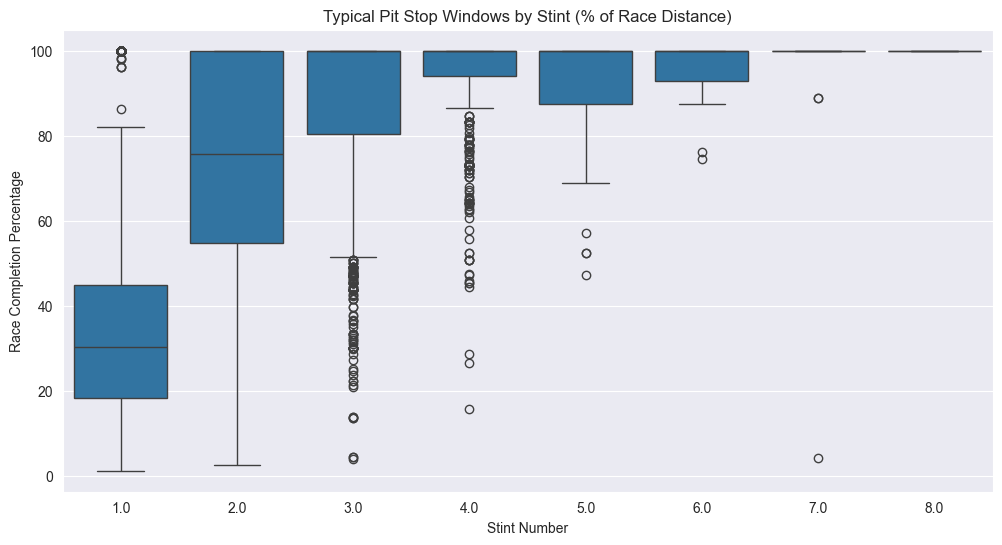

In [68]:
# Analyze pit stop patterns
if 'Pit_Lap' in df.columns and df['Pit_Lap'].notna().any():
    print("\nPit stop timing patterns:")

    # Calculate percentage of race distance for pit stops
    max_laps = df.groupby(['Season', 'Round'])['Laps'].transform('max')
    df['Pit_Lap_Pct'] = df['Pit_Lap'] / max_laps * 100

    # Analyze pit timing by stint
    pit_timing_by_stint = df.groupby('Stint')['Pit_Lap_Pct'].describe()
    print(pit_timing_by_stint[['count', 'mean', 'std', '25%', '50%', '75%']])

    # Visualize typical pit windows
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Stint', y='Pit_Lap_Pct', data=df[df['Pit_Lap_Pct'] <= 100])
    plt.title('Typical Pit Stop Windows by Stint (% of Race Distance)')
    plt.xlabel('Stint Number')
    plt.ylabel('Race Completion Percentage')
    plt.show()

In [69]:
# Correlation analysis for key missing metrics
print("\n\nCorrelation analysis for key missing metrics:")

# Create a correlation matrix for driver performance metrics
driver_metrics = ['Tire Usage Aggression', 'Fast Lap Attempts', 'Driver Aggression Score',
                  'Position', 'Position Changes', 'Laps']
driver_corr = df[driver_metrics].corr()

print("\nCorrelation between driver performance metrics:")
print(driver_corr)

# Check if there are proxy variables that could help with imputation
print("\nVariables most correlated with Tire Usage Aggression:")
print(driver_corr['Tire Usage Aggression'].sort_values(ascending=False))

print("\nVariables most correlated with Driver Aggression Score:")
print(driver_corr['Driver Aggression Score'].sort_values(ascending=False))

print("\nVariables most correlated with Fast Lap Attempts:")
print(driver_corr['Fast Lap Attempts'].sort_values(ascending=False))



Correlation analysis for key missing metrics:

Correlation between driver performance metrics:
                         Tire Usage Aggression  Fast Lap Attempts  \
Tire Usage Aggression                 1.000000           0.191991   
Fast Lap Attempts                     0.191991           1.000000   
Driver Aggression Score               0.192795           0.999999   
Position                              0.132606          -0.068352   
Position Changes                      0.132606          -0.068352   
Laps                                 -0.267793          -0.013533   

                         Driver Aggression Score  Position  Position Changes  \
Tire Usage Aggression                   0.192795  0.132606          0.132606   
Fast Lap Attempts                       0.999999 -0.068352         -0.068352   
Driver Aggression Score                 1.000000 -0.067611         -0.067611   
Position                               -0.067611  1.000000          1.000000   
Position Changes   

In [70]:
# Implementation of imputation strategies based on F1 race dynamics

# 1. Tire Usage Aggression (66 missing)
print("\nImputing Tire Usage Aggression...")

if df['Tire Usage Aggression'].isna().sum() > 0:
    # Strategy: Impute based on driver's historical aggression with same tire compound
    for idx in df[df['Tire Usage Aggression'].isna()].index:
        driver = df.loc[idx, 'Driver']
        if 'Tire Compound' in df.columns and not pd.isna(df.loc[idx, 'Tire Compound']):
            compound = df.loc[idx, 'Tire Compound']

            # Get driver's average aggression with this compound
            driver_compound_avg = df[(df['Driver'] == driver) &
                                     (df['Tire Compound'] == compound) &
                                     df['Tire Usage Aggression'].notna()]['Tire Usage Aggression'].mean()

            if not pd.isna(driver_compound_avg):
                df.loc[idx, 'Tire Usage Aggression'] = driver_compound_avg
                continue

        # Fallback: Driver's overall average
        driver_avg = df[(df['Driver'] == driver) &
                        df['Tire Usage Aggression'].notna()]['Tire Usage Aggression'].mean()

        if not pd.isna(driver_avg):
            df.loc[idx, 'Tire Usage Aggression'] = driver_avg
            continue

        # Second fallback: Constructor average
        constructor = df.loc[idx, 'Constructor']
        team_avg = df[(df['Constructor'] == constructor) &
                      df['Tire Usage Aggression'].notna()]['Tire Usage Aggression'].mean()

        if not pd.isna(team_avg):
            df.loc[idx, 'Tire Usage Aggression'] = team_avg
            continue

        # Final fallback: Global average
        df.loc[idx, 'Tire Usage Aggression'] = df['Tire Usage Aggression'].mean()


Imputing Tire Usage Aggression...


In [71]:
# 2. Fast Lap Attempts and Driver Aggression Score (185 missing each)
print("\nImputing Driver Performance Metrics...")

for metric in ['Fast Lap Attempts', 'Driver Aggression Score']:
    if df[metric].isna().sum() > 0:
        # These metrics are driver-specific and vary by race situation
        for idx in df[df[metric].isna()].index:
            driver = df.loc[idx, 'Driver']
            position = df.loc[idx, 'Position']

            # Impute based on driver's historical values in similar positions
            similar_positions = range(max(1, position-2), position+3)  # Position ±2
            driver_position_avg = df[(df['Driver'] == driver) &
                                     df['Position'].isin(similar_positions) &
                                     df[metric].notna()][metric].mean()

            if not pd.isna(driver_position_avg):
                df.loc[idx, metric] = driver_position_avg
                continue

            # Fallback: Driver's overall average
            driver_avg = df[(df['Driver'] == driver) & df[metric].notna()][metric].mean()

            if not pd.isna(driver_avg):
                df.loc[idx, metric] = driver_avg
                continue

            # Position-based average (how drivers in this position typically behave)
            position_avg = df[df['Position'] == position & df[metric].notna()][metric].mean()

            if not pd.isna(position_avg):
                df.loc[idx, metric] = position_avg
                continue

            # Final fallback: Global average
            df.loc[idx, metric] = df[metric].mean()


Imputing Driver Performance Metrics...


In [72]:
# 3. Stint, Stint Length, Pit_Lap, Max_Stint (109 missing each)
print("\nImputing Stint-related metrics...")
# First, identify if these are DNF entries

if 'Laps' in df.columns:
    max_race_laps = df.groupby(['Season', 'Round'])['Laps'].transform('max')
    df['Race_Completion'] = df['Laps'] / max_race_laps

    # For rows with missing stint data
    stint_missing = df[df['Stint'].isna()]

    # Analyze if these are mostly DNF or partially completed races
    dnf_threshold = 0.9  # 90% race completion
    dnf_count = (stint_missing['Race_Completion'] < dnf_threshold).sum()

    print(f"Of {len(stint_missing)} rows with missing stint data:")
    print(f"-- {dnf_count} ({dnf_count/len(stint_missing)*100:.1f}%) appear to be DNF/partial races")

# Imputation strategy for Stint data
for idx in df[df['Stint'].isna()].index:
    # For Stint column (set to 1 for first and only stint)
    df.loc[idx, 'Stint'] = 1

    # For Max_Stint (one stint only for DNF)
    df.loc[idx, 'Max_Stint'] = 1

    # For Stint Length (equal to laps completed)
    if 'Laps' in df.columns:
        df.loc[idx, 'Stint Length'] = df.loc[idx, 'Laps']

    # For Pit_Lap (no pit stop for DNF/single stint, so set to final lap)
    if 'Laps' in df.columns:
        df.loc[idx, 'Pit_Lap'] = df.loc[idx, 'Laps']


Imputing Stint-related metrics...
Of 109 rows with missing stint data:
-- 20 (18.3%) appear to be DNF/partial races


In [73]:
# 4. Remaining Tire Compound missing values (40 remaining)
print("\nImputing remaining Tire Compound values...")

for idx in df[df['Tire Compound'].isna()].index:
    season = df.loc[idx, 'Season']
    round_num = df.loc[idx, 'Round']
    stint_num = df.loc[idx, 'Stint']

    # For starting stint, use most common starting compound for that race
    if stint_num == 1:
        most_common_starter = df[(df['Season'] == season) &
                                 (df['Round'] == round_num) &
                                 (df['Stint'] == 1) &
                                 df['Tire Compound'].notna()]['Tire Compound'].mode()

        if not most_common_starter.empty:
            df.loc[idx, 'Tire Compound'] = most_common_starter[0]
            continue

    # For final stint, use most common finishing compound
    if 'Max_Stint' in df.columns and df.loc[idx, 'Stint'] == df.loc[idx, 'Max_Stint']:
        most_common_finisher = df[(df['Season'] == season) &
                                  (df['Round'] == round_num) &
                                  (df['Stint'] == df['Max_Stint']) &
                                  df['Tire Compound'].notna()]['Tire Compound'].mode()

        if not most_common_finisher.empty:
            df.loc[idx, 'Tire Compound'] = most_common_finisher[0]
            continue

    # For middle stints, use most common compound for that stint number
    most_common_for_stint = df[(df['Season'] == season) &
                               (df['Round'] == round_num) &
                               (df['Stint'] == stint_num) &
                               df['Tire Compound'].notna()]['Tire Compound'].mode()

    if not most_common_for_stint.empty:
        df.loc[idx, 'Tire Compound'] = most_common_for_stint[0]
        continue

    # Fallback: Use most common compound overall for that race
    race_common = df[(df['Season'] == season) &
                     (df['Round'] == round_num) &
                     df['Tire Compound'].notna()]['Tire Compound'].mode()

    if not race_common.empty:
        df.loc[idx, 'Tire Compound'] = race_common[0]
    else:
        # Final fallback: Use "SOFT" as default
        df.loc[idx, 'Tire Compound'] = "SOFT"


Imputing remaining Tire Compound values...


In [74]:
# Verify imputation results
print("\nRemaining missing values after imputation:")

for col in ['Tire Usage Aggression', 'Fast Lap Attempts', 'Driver Aggression Score',
            'Stint', 'Tire Compound', 'Stint Length', 'Pit_Lap', 'Max_Stint']:
    print(f"{col}: {df[col].isna().sum()}")


Remaining missing values after imputation:
Tire Usage Aggression: 0
Fast Lap Attempts: 0
Driver Aggression Score: 0
Stint: 0
Tire Compound: 0
Stint Length: 0
Pit_Lap: 0
Max_Stint: 0


In [75]:
print(df.isna().sum())

Season                       0
Round                        0
Circuit                      0
Driver                       0
Constructor                  0
Laps                         0
Position                     0
TotalPitStops                0
AvgPitStopTime               0
Race Name                    0
Date                         0
Time_of_race                 0
Location                     0
Country                      0
Air_Temp_C                   0
Track_Temp_C                 0
Humidity_%                   0
Wind_Speed_KMH               0
Lap Time Variation           0
Total Pit Stops              0
Tire Usage Aggression        0
Fast Lap Attempts            0
Position Changes             0
Driver Aggression Score      0
Abbreviation                 0
Stint                        0
Tire Compound                0
Stint Length                 0
Pit_Lap                      0
Pit_Time                     0
Max_Stint                    0
Is_Final_Stint               0
Pit_Time